In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf
from scipy.stats import norm, kurtosis

In [3]:
# Load mid-price data
prices = pd.read_csv("../day06_market_simulation/data/mid_price.csv")


# Ensure sorted by time
prices = prices.sort_values("time")

# Compute log returns
prices["log_return"] = np.log(prices["mid_price"]).diff()

# Drop NaN from first diff
returns = prices["log_return"].dropna()

returns.head()

1    0.004993
2   -0.002993
3    0.006969
4   -0.006969
5    0.014874
Name: log_return, dtype: float64

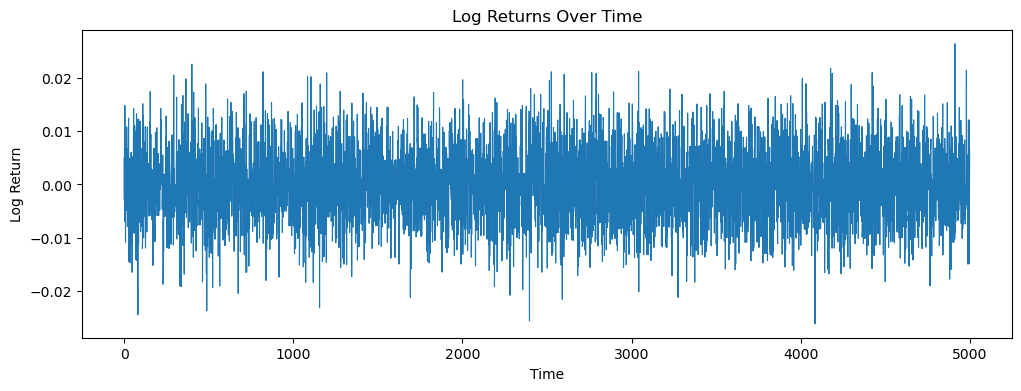

In [4]:
plt.figure(figsize=(12, 4))
plt.plot(returns.values, linewidth=0.8)
plt.title("Log Returns Over Time")
plt.xlabel("Time")
plt.ylabel("Log Return")
plt.show()

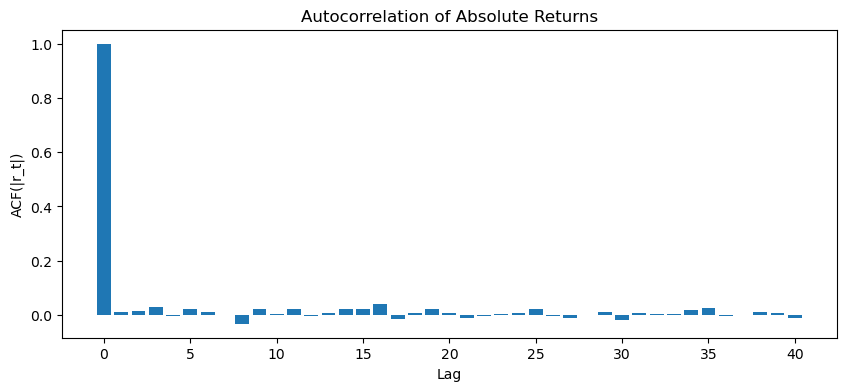

In [5]:
abs_returns = np.abs(returns)

acf_vals = acf(abs_returns, nlags=40, fft=True)

plt.figure(figsize=(10, 4))
plt.bar(range(len(acf_vals)), acf_vals)
plt.title("Autocorrelation of Absolute Returns")
plt.xlabel("Lag")
plt.ylabel("ACF(|r_t|)")
plt.show()

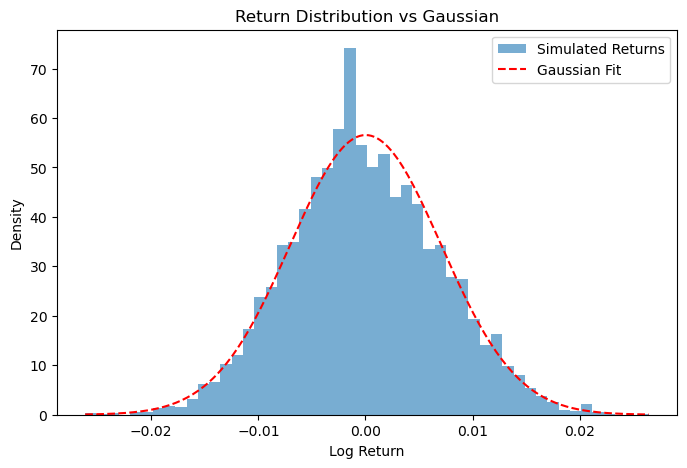

In [6]:
mu, sigma = returns.mean(), returns.std()

x = np.linspace(returns.min(), returns.max(), 200)
gaussian_pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(8, 5))
plt.hist(returns, bins=50, density=True, alpha=0.6, label="Simulated Returns")
plt.plot(x, gaussian_pdf, 'r--', label="Gaussian Fit")
plt.title("Return Distribution vs Gaussian")
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.legend()
plt.show()

In [7]:
empirical_kurtosis = kurtosis(returns, fisher=False)

print(f"Empirical Kurtosis: {empirical_kurtosis:.2f}")

Empirical Kurtosis: 2.95


Day 7 – Stylized Facts: Volatility Clustering & Fat Tails
Volatility Clustering
The computed log-return time series is identically zero across time, resulting in a flat return profile with no observable volatility bursts. Consequently, the autocorrelation function of absolute returns is undefined, indicating the absence of volatility clustering in the current simulation.

This behavior arises because the simulated mid-price remains constant throughout the run. While trades and liquidity are present, the market lacks a mechanism that translates order flow imbalance into price impact. As a result, price dynamics are effectively frozen.

Fat-Tailed Return Distribution:
The return distribution collapses to a degenerate spike at zero, and empirical kurtosis is undefined. This indicates the absence of fat-tailed behavior and extreme price movements.

The lack of tail risk is a direct consequence of static price formation rather than a failure of the analysis pipeline.

Verdict:
Neither volatility clustering nor fat-tailed returns are present in the current market configuration. This outcome highlights a missing feedback mechanism between order flow and price formation.

Specifically, the market lacks:

Price impact from order imbalance
Adaptive spread adjustment by market makers
Inventory-based quote skewing
These mechanisms are necessary for endogenous volatility and stress amplification to emerge and will be introduced in subsequent iterations.